In [1]:
from PIL import Image

# 깊이 측정

In [47]:
import cv2
from realsense_camera import *

# Load RealSenseCamera
rs = RealsenseCamera()

while True:
    ret, bgr_frame, depth_frame = rs.get_frame_stream()
    
    point_x, point_y = 640, 360 # 깊이 측정할 좌표
    distance_mm = depth_frame[point_y, point_x]
    
    cv2.circle(bgr_frame, (point_x, point_y), 8, (0, 0, 255), -1)
    
    cv2.putText(bgr_frame, "{} mm".format(distance_mm), (point_x, point_y- 10), 0, 1, (0, 0, 255), 2)
    
    cv2.imshow("Bgr frame", bgr_frame)
    
    key = cv2.waitKey(1)

    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break

Loading Intel Realsense Camera


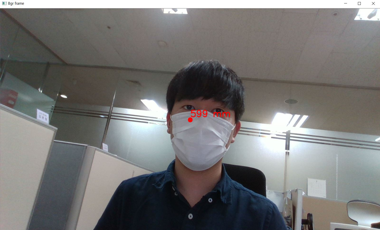

In [14]:
image1 = Image.open("images\image1.JPG")
image1 = image1.resize((380, 230))
image1

# 얼굴 인식

In [48]:
import cv2
from realsense_camera import *
import mediapipe as mp

# Load RealSenseCamera
rs = RealsenseCamera()

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection()

while True:
    ret, bgr_frame, depth_frame = rs.get_frame_stream()
    
    imgRGB = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(imgRGB)
    
    if results.detections:
        for id, detection in enumerate(results.detections):
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = bgr_frame.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(bgr_frame, bbox, (255, 0, 255), 2)
    
    cv2.imshow("Bgr frame", bgr_frame)
    
    key = cv2.waitKey(1)

    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break 

Loading Intel Realsense Camera


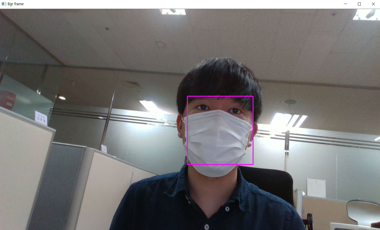

In [10]:
image1 = Image.open("images\image2.JPG")
image1 = image1.resize((380, 230))
image1

# 카메라와 얼굴간의 깊이 측정

In [50]:
import cv2
from realsense_camera import *
import mediapipe as mp

# Load RealSenseCamera
rs = RealsenseCamera()

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection()

while True:
    ret, bgr_frame, depth_frame = rs.get_frame_stream()
    
    imgRGB = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(imgRGB)
    
    if results.detections:
        for id, detection in enumerate(results.detections):
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = bgr_frame.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(bgr_frame, bbox, (255, 0, 255), 2)
            
            cx, cy = int(bboxC.xmin * iw), int(bboxC.ymin * ih)
             
            distance_mm = depth_frame[cy+10, cx+10]
    
            cv2.putText(bgr_frame, "{} mm".format(distance_mm), (cx, cy- 10), 0, 1, (0, 0, 255), 2)
            
    cv2.imshow("Bgr frame", bgr_frame)
    
    key = cv2.waitKey(1)

    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break

Loading Intel Realsense Camera


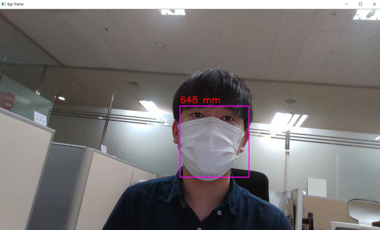

In [11]:
image1 = Image.open("images\image3.JPG")
image1 = image1.resize((380, 230))
image1

# 일정 거리가 되면 텍스트 출력

In [51]:
import cv2
from realsense_camera import *
import mediapipe as mp

# Load RealSenseCamera
rs = RealsenseCamera()

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection()

while True:
    ret, bgr_frame, depth_frame = rs.get_frame_stream()
    
    imgRGB = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(imgRGB)
    
    cv2.putText(bgr_frame, "Temperature :", (330, 50), 0, 2, (0, 255, 0), 4)
    
    if results.detections:
        for id, detection in enumerate(results.detections):
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = bgr_frame.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(bgr_frame, bbox, (255, 0, 255), 2)
            
            cx, cy = int(bboxC.xmin * iw), int(bboxC.ymin * ih)
             
            distance_mm = depth_frame[cy, cx]
    
            cv2.putText(bgr_frame, "{} mm".format(distance_mm), (cx, cy- 10), 0, 1, (0, 0, 255), 2)
        
            if distance_mm < 700 :
                cv2.putText(bgr_frame, "36.7", (810, 50), 0, 2, (0, 0, 255), 4)
            
    cv2.imshow("Bgr frame", bgr_frame)
    
    key = cv2.waitKey(1)

    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break

Loading Intel Realsense Camera


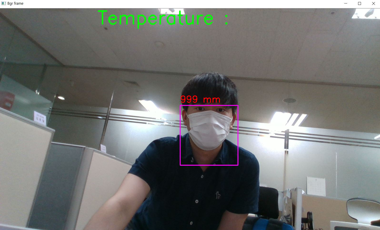

In [12]:
image1 = Image.open("images\image4.JPG")
image1 = image1.resize((380, 230))
image1